In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, LSTM
from scipy.stats import skew
import string 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


df = pd.read_csv('/content/phone_reviews.csv')
df.head()

,Unnamed: 0,mobile_names,asin,title,body,star
0,0,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nvalue money go it\n,update 15082020never give chance regret go ah...,4
1,1,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\n\n,title obviously monsterand good performance,5
2,2,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nbest budget phone india\n,brilliant camera huge battery life brilliant ...,5
3,3,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nbattery life upto mark\n,writing review using 6 daysi bought sumsung p...,3
4,4,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nfeeling cheated\n,defective product received gets 8 12 hours ch...,1


In [2]:
print(len(df))

17248


In [3]:
df.isnull().sum()

Unnamed: 0      0
mobile_names    0
asin            0
title           0
body            0
star            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


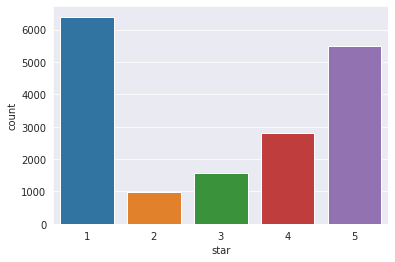

In [4]:
sns.set_style('darkgrid')
sns.countplot(df.star)

In [5]:
df = df.drop(columns=['Unnamed: 0','mobile_names','asin','title'])
df.head()


,body,star
0,update 15082020never give chance regret go ah...,4
1,title obviously monsterand good performance,5
2,brilliant camera huge battery life brilliant ...,5
3,writing review using 6 daysi bought sumsung p...,3
4,defective product received gets 8 12 hours ch...,1


In [6]:
string.punctuation

def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct
df['body_clean'] = df['body'].apply(lambda x: remove_punct(x))
df.head()

,body,star,body_clean
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...
1,title obviously monsterand good performance,5,title obviously monsterand good performance
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...


In [7]:
def tokenize(text):
  tokens = re.split("[\s.,!?:;'\"-]+{}=()",text)
  return tokens

df['body_tokenized'] = df['body_clean'].apply(lambda x: tokenize(x.lower()))
df.head()

,body,star,body_clean,body_tokenized
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...
1,title obviously monsterand good performance,5,title obviously monsterand good performance,[ title obviously monsterand good performance]
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...


In [8]:
nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text

df['body_x'] = df['body_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body,star,body_clean,body_tokenized,body_x
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...
1,title obviously monsterand good performance,5,title obviously monsterand good performance,[ title obviously monsterand good performance],[ title obviously monsterand good performance]
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...


In [9]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

df['body_stemmed'] =  df['body_x'].apply(lambda x: stemming(x))
df.head()

,body,star,body_clean,body_tokenized,body_x,body_stemmed
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...
1,title obviously monsterand good performance,5,title obviously monsterand good performance,[ title obviously monsterand good performance],[ title obviously monsterand good performance],[ title obviously monsterand good perform]
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...


In [10]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text

df['body_lemmatized'] =  df['body_x'].apply(lambda x: lemmatizing(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,body,star,body_clean,body_tokenized,body_x,body_stemmed,body_lemmatized
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...
1,title obviously monsterand good performance,5,title obviously monsterand good performance,[ title obviously monsterand good performance],[ title obviously monsterand good performance],[ title obviously monsterand good perform],[ title obviously monsterand good performance]
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...


In [11]:
df['body'] = df['body_clean']
df.head()

,body,star,body_clean,body_tokenized,body_x,body_stemmed,body_lemmatized
0,update 15082020never give chance regret go ah...,4,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...
1,title obviously monsterand good performance,5,title obviously monsterand good performance,[ title obviously monsterand good performance],[ title obviously monsterand good performance],[ title obviously monsterand good perform],[ title obviously monsterand good performance]
2,brilliant camera huge battery life brilliant ...,5,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...
3,writing review using 6 daysi bought sumsung p...,3,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...
4,defective product received gets 8 12 hours ch...,1,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...


In [12]:
df.isnull().values.any()

False

In [13]:
category = pd.get_dummies(df.star)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='star')
df_baru.head()

,body,body_clean,body_tokenized,body_x,body_stemmed,body_lemmatized,1,2,3,4,5
0,update 15082020never give chance regret go ah...,update 15082020never give chance regret go ah...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,[ update 15082020never give chance regret go a...,0,0,0,1,0
1,title obviously monsterand good performance,title obviously monsterand good performance,[ title obviously monsterand good performance],[ title obviously monsterand good performance],[ title obviously monsterand good perform],[ title obviously monsterand good performance],0,0,0,0,1
2,brilliant camera huge battery life brilliant ...,brilliant camera huge battery life brilliant ...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,[ brilliant camera huge battery life brilliant...,0,0,0,0,1
3,writing review using 6 daysi bought sumsung p...,writing review using 6 daysi bought sumsung p...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,[ writing review using 6 daysi bought sumsung ...,0,0,1,0,0
4,defective product received gets 8 12 hours ch...,defective product received gets 8 12 hours ch...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,[ defective product received gets 8 12 hours c...,1,0,0,0,0


In [14]:
deskripsi = df_baru['body'].values
label = df_baru[[1,2,3,4,5]].values

In [15]:
deskripsi_latih, deskripsi_test, label_latih, label_test = train_test_split(deskripsi, label, test_size=0.2)

In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(deskripsi_latih)
tokenizer.fit_on_texts(deskripsi_test)
 
sekuens_latih = tokenizer.texts_to_sequences(deskripsi_latih)
sekuens_test = tokenizer.texts_to_sequences(deskripsi_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
     if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print('\n Akurasi telah mencapai > 90%')
      self.model_stop_training = True
callbacks = myCallback()

In [19]:
hist = model.fit(padded_latih, label_latih, epochs=5, 
                 validation_data=(padded_test, label_test),
                 validation_split=0.2,
                 verbose=2,
                 batch_size=64,
                 callbacks=[callbacks])

Epoch 1/5
173/173 - 247s - loss: 0.9142 - accuracy: 0.6445 - val_loss: 0.3124 - val_accuracy: 0.8942
Epoch 2/5
173/173 - 222s - loss: 0.1939 - accuracy: 0.9406 - val_loss: 0.1400 - val_accuracy: 0.9569

 Akurasi telah mencapai > 90%
Epoch 3/5
173/173 - 225s - loss: 0.0959 - accuracy: 0.9722 - val_loss: 0.0783 - val_accuracy: 0.9743

 Akurasi telah mencapai > 90%
Epoch 4/5
173/173 - 242s - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.0645 - val_accuracy: 0.9826

 Akurasi telah mencapai > 90%
Epoch 5/5
173/173 - 237s - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0457 - val_accuracy: 0.9866

 Akurasi telah mencapai > 90%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


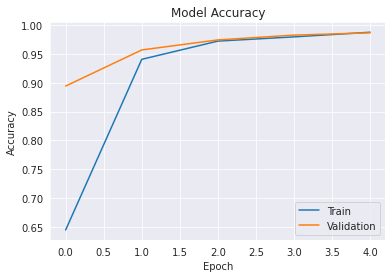

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='bottom right')
plt.show()

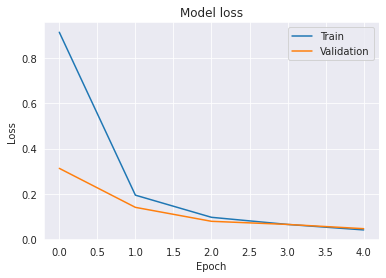

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()